<a href="https://colab.research.google.com/github/TakuroTerui/image_classification_django/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%97%E3%83%AA%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install icrawler

# 必要なモジュールをインポート
from icrawler.builtin import BingImageCrawler
import numpy as np
from PIL import Image

In [ ]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

     |████████████████████████████████| 525 kB 13.0 MB/s 
     |████████████████████████████████| 332 kB 69.1 MB/s 
     |████████████████████████████████| 829 kB 72.5 MB/s 
     |████████████████████████████████| 596 kB 80.4 MB/s 
     |████████████████████████████████| 132 kB 66.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.7 MB/s 
     |████████████████████████████████| 271 kB 52.7 MB/s 
     |████████████████████████████████| 160 kB 72.8 MB/s 
     |████████████████████████████████| 192 kB 71.6 MB/s 


In [ ]:
!unzip /content/images.zip

Archive:  /content/images.zip
   creating: animal_images/
   creating: animal_images/ゾウ/
  inflating: animal_images/ゾウ/000005.jpg  
  inflating: animal_images/ゾウ/000027.jpg  
  inflating: animal_images/ゾウ/000011.jpg  
  inflating: animal_images/ゾウ/000021.jpg  
  inflating: animal_images/ゾウ/000003.jpg  
  inflating: animal_images/ゾウ/000022.jpg  
  inflating: animal_images/ゾウ/000008.jpg  
  inflating: animal_images/ゾウ/000018.jpg  
  inflating: animal_images/ゾウ/000015.jpg  
  inflating: animal_images/ゾウ/000023.jpg  
  inflating: animal_images/ゾウ/000016.jpg  
  inflating: animal_images/ゾウ/000029.jpg  
  inflating: animal_images/ゾウ/000017.jpg  
  inflating: animal_images/ゾウ/000004.jpg  
  inflating: animal_images/ゾウ/000002.jpg  
  inflating: animal_images/ゾウ/000013.jpg  
  inflating: animal_images/ゾウ/000007.jpg  
  inflating: animal_images/ゾウ/000006.jpg  
  inflating: animal_images/ゾウ/000001.jpg  
  inflating: animal_images/ゾウ/000019.jpg  
  inflating: animal_images/ゾウ/000025.jpg  
  inflat

In [ ]:
# # ルートディレクトリを定義
# root_dir = './animal_images/'

# # キーワードを指定
# keywords = ['パンダ', 'ゴリラ', 'ホッキョクグマ', 'ゾウ']
# keys = ['a', 'b', 'c', 'd']

In [ ]:
# for keyword, key in zip(keywords, keys):
#     target_dir = root_dir + key + keyword
#     crawler = BingImageCrawler(storage = {'root_dir' : target_dir})
#    # 枚数を指定
#     max_num = 1000
#     crawler.crawl(keyword = keyword, max_num = max_num)

In [ ]:
from torchvision import transforms, datasets

In [ ]:
# 前処理
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# 前処理とアノテーション（ラベル付け）
dataset = datasets.ImageFolder('/content/animal_images', transform)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 120
    Root location: /content/animal_images
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
dataset[0]

(tensor([[[ 0.5707,  0.5707,  0.4508,  ...,  2.0605,  2.0777,  2.0605],
          [ 0.3994,  0.6049,  0.5536,  ...,  2.0777,  2.0777,  2.0605],
          [ 0.6049,  0.5536,  0.6221,  ...,  2.0777,  2.0777,  2.0605],
          ...,
          [-1.6555, -1.6384, -1.5870,  ..., -1.1418, -1.1247, -1.0390],
          [-1.6384, -1.6555, -1.6213,  ..., -1.1932, -1.1075, -1.1075],
          [-1.6384, -1.6555, -1.6384,  ..., -1.1247, -1.1589, -1.0390]],
 
         [[ 0.5378,  0.5728,  0.4853,  ...,  2.2360,  2.2535,  2.2360],
          [ 0.3978,  0.6429,  0.6078,  ...,  2.2535,  2.2360,  2.2360],
          [ 0.6779,  0.5903,  0.6779,  ...,  2.2360,  2.2360,  2.2360],
          ...,
          [-1.5630, -1.5455, -1.5105,  ..., -1.0553, -1.0378, -0.9328],
          [-1.5630, -1.5630, -1.5280,  ..., -1.0903, -1.0203, -1.0203],
          [-1.5455, -1.5805, -1.5455,  ..., -0.9853, -1.0378, -0.9328]],
 
         [[ 0.7576,  0.7925,  0.7228,  ...,  2.4483,  2.4657,  2.4483],
          [ 0.6182,  0.8274,

In [ ]:
dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
len(dataset)

120

In [ ]:
dataset[1][0].shape

torch.Size([3, 224, 224])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import torchsummary
from torchsummary import summary

In [ ]:
# trainとvalに分割
n_train = 100
n_val = 20

torch.manual_seed(0)
train, val = torch.utils.data.random_split(dataset, [n_train, n_val])

In [ ]:
len(train), len(val)

(100, 20)

In [ ]:
train[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
# バッチサイズの定義
batch_size = 4

# Data Loaderを定義
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)

In [ ]:
from torchvision.models import resnet18

In [ ]:
class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.feature = resnet18(pretrained=True)
        self.fc = nn.Linear(1000, 4)


    def forward(self, x):
        h = self.feature(x)
        h = self.fc(h)
        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=False, on_epoch=True)
        self.log('train_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

In [ ]:
# 学習の実行
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(max_epochs=30, gpus=0, deterministic=True, logger=logger)
trainer.fit(net, train_loader, val_loader)

Global seed set to 0
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type   | Params
-----------------------------------
0 | feature | ResNet | 11.7 M
1 | fc      | Linear | 4.0 K 
-----------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.774    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:413: UserWarning: The number of training samples (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
torch.save(net.state_dict(), 'image.pt')

In [ ]:
# 学習ログの取得
log = pd.read_csv('logs/my_exp/version_0/metrics.csv')

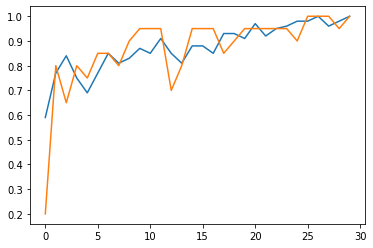

In [ ]:
# accuracy
log[['train_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['train_acc'].plot();
log[['val_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['val_acc'].plot();

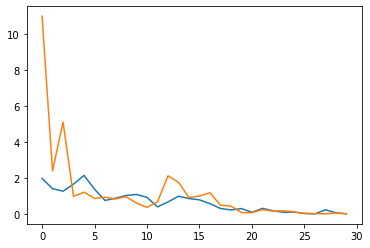

In [ ]:
# loss
log[['train_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['train_loss'].plot();
log[['val_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['val_loss'].plot();

In [ ]:
# loaded_model = torch.load('/content/image.pt')

In [ ]:
# 推論時の前処理
from glob import glob
from natsort import natsorted

In [ ]:
paths = natsorted(glob('/content/test/*.jpg'))

In [ ]:
imgs = []
for path in paths:
    img = Image.open(path)
    img = transform(img)
    imgs.append(img)

In [ ]:
import torch
imgs = torch.stack(imgs)

In [ ]:
y = torch.argmax(net(imgs), dim=1).cpu().detach().numpy()

In [ ]:
y

array([0, 0, 2, 3, 2, 1, 1, 1, 3, 0])

In [ ]:
loaded_model = Net().cpu().eval()

In [ ]:
loaded_model.load_state_dict(torch.load('/content/image.pt'))

<All keys matched successfully>

In [ ]:
img = Image.open('/content/000001.jpg')
img = transform(img)
img.shape

torch.Size([3, 224, 224])

In [ ]:
y = loaded_model(img.unsqueeze(0))


In [ ]:
y

tensor([[-10.4589,   1.5789,  13.9271,  -7.9999]], grad_fn=<AddmmBackward0>)

In [ ]:
y = F.softmax(y)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[2.5663e-11, 4.3375e-06, 1.0000e+00, 3.0007e-10]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
torch.max(y).item() * 100

99.99957084655762

In [ ]:
y = torch.argmax(y)
y.item()

2

In [ ]:
cimg = Image.open('/content/000001.jpg')
img = transform(img)
# 予測値の算出
y = loaded_model(img)

# 確率に変換
y = F.softmax(y)
proba = max(y) * 100

# 予測ラベル
y = torch.argmax(y)

TypeError: ignored